<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/10_Vietnamese_Dishes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/VNFOOD', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 167 images belonging to 10 classes.


In [ ]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
6/6 [==============================] - 51s 7s/step - loss: 2.6630 - accuracy: 0.1138
Epoch 2/20
6/6 [==============================] - 38s 5s/step - loss: 2.3024 - accuracy: 0.1198
Epoch 3/20
6/6 [==============================] - 40s 8s/step - loss: 2.3101 - accuracy: 0.0838
Epoch 4/20
6/6 [==============================] - 27s 4s/step - loss: 2.2845 - accuracy: 0.1497
Epoch 5/20
6/6 [==============================] - 26s 4s/step - loss: 2.2558 - accuracy: 0.1377
Epoch 6/20
6/6 [==============================] - 26s 4s/step - loss: 2.2097 - accuracy: 0.1916
Epoch 7/20
6/6 [==============================] - 26s 4s/step - loss: 2.0990 - accuracy: 0.2395
Epoch 8/20
6/6 [==============================] - 25s 4s/step - loss: 1.9681 - accuracy: 0.3293
Epoch 9/20
6/6 [==============================] - 25s 4s/step - loss: 1.8489 - accuracy: 0.3653
Epoch 10/20
6/6 [==============================] - 25s 4s/step - loss: 1.7669 - accuracy: 0.3653
Epoch 11/20
6/6 [======================

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.5427219867706299
Do chinh xac 0.8143712282180786


In [ ]:
training_set.class_indices

{'banhcuon': 0,
 'banhgoi': 1,
 'banhmi': 2,
 'banhran': 3,
 'banhxeo': 4,
 'bunbo': 5,
 'buncha': 6,
 'bunoc': 7,
 'che': 8,
 'comtam': 9}

In [ ]:
model.save('VD.h5')
model_CNN = load_model('VD.h5')

1/1 [==============================] - 0s 154ms/step


array([9])

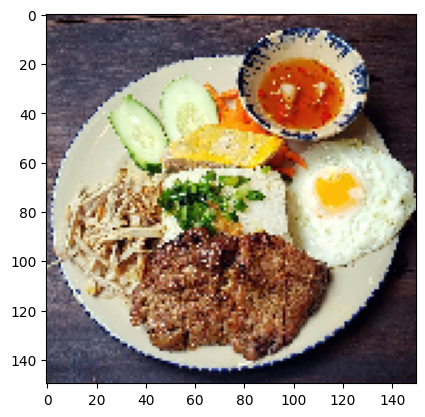

In [ ]:
img = load_img('/content/drive/MyDrive/VNFOOD/comtam/8.jpg', target_size = (150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model_CNN.predict(img), axis = 1)

1/1 [==============================] - 0s 120ms/step


array([5])

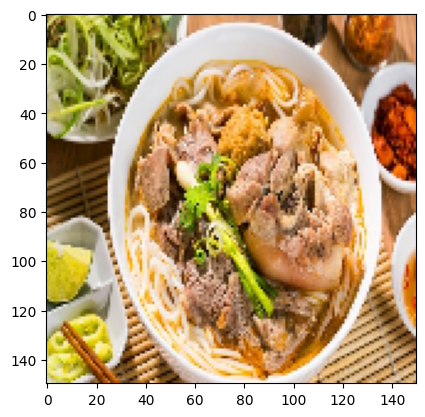

In [ ]:
img = load_img('/content/drive/MyDrive/VNFOOD/bunbo/3.jpg', target_size = (150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model_CNN.predict(img), axis = 1)